In [1]:
#imorting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset
customer_churn = pd.read_csv("telecom_churn.csv")

In [3]:
#checking 1st five rows
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#checking the shape of dataset
customer_churn.shape

(7043, 21)

In [5]:
#dropping the "customerID" column
customer_churn.drop("customerID", axis = "columns", inplace = True)

In [6]:
#checking basic information about the dataset
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
#display summary statistics
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#checking for missing values
customer_churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#checking duplicate values
customer_churn.duplicated().sum()

22

In [10]:
#count of unique values in the churn column
customer_churn["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

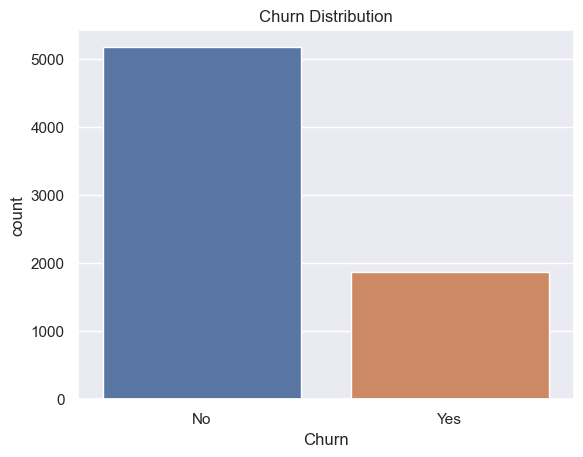

In [11]:
#churn distribution
sns.set()
sns.countplot(x = "Churn", data = customer_churn)
plt.title("Churn Distribution")
plt.show()

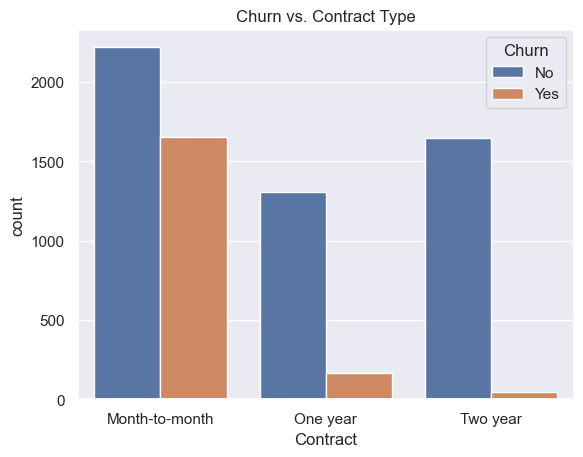

In [12]:
#visualizing the relationship between "Contract" and "Churn" using Countplot
sns.countplot(x = "Contract", hue = "Churn", data = customer_churn)
plt.title("Churn vs. Contract Type")
plt.show()

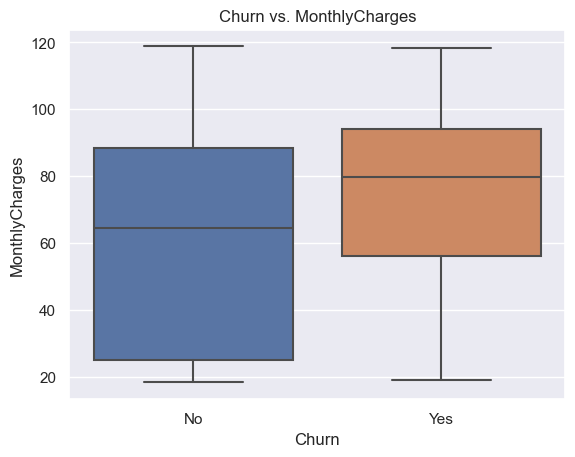

In [13]:
#boxplot to visualize the relationship between "Churn" and "MonthlyCharges"
sns.boxplot(x = "Churn", y = "MonthlyCharges", data = customer_churn)
plt.title('Churn vs. MonthlyCharges')
plt.show()

In [14]:
#count of unique values in the gender column
customer_churn["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

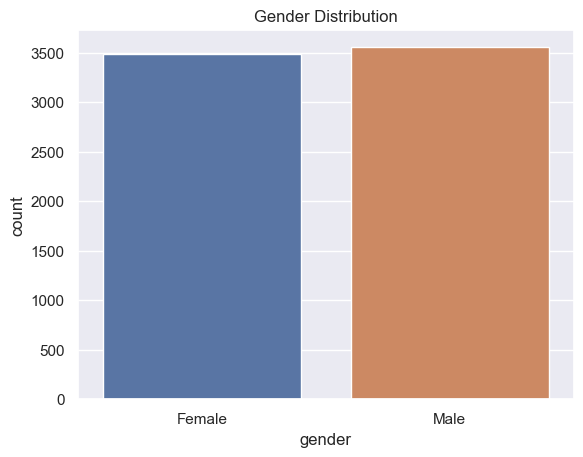

In [15]:
#gender distribution
sns.countplot(x = "gender", data = customer_churn)
plt.title("Gender Distribution")
plt.show()

In [16]:
#count of unique values in seniorcitizen column
customer_churn["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

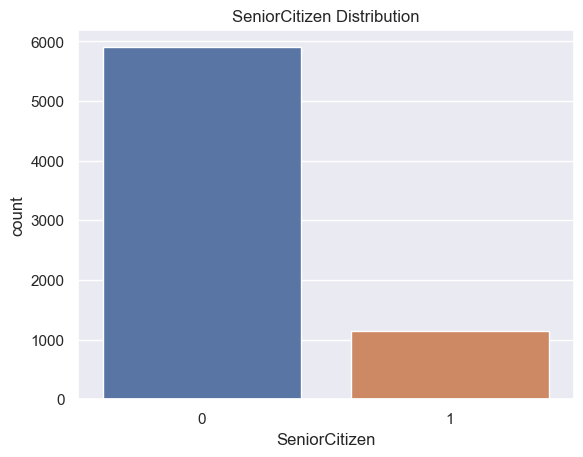

In [17]:
#distribution of SeniorCitizen
sns.countplot(x = "SeniorCitizen", data = customer_churn)
plt.title("SeniorCitizen Distribution")
plt.show()

In [18]:
#count of unique values in the phoneservice column
customer_churn["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

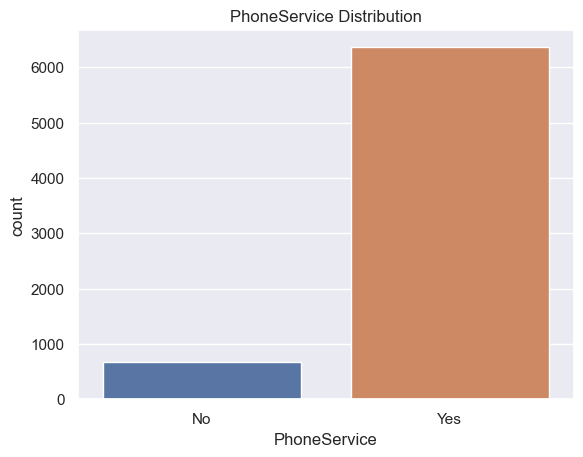

In [19]:
#distribution of PhoneService
sns.countplot(x = "PhoneService", data = customer_churn)
plt.title("PhoneService Distribution")
plt.show()

In [20]:
#count of unique values in the internetservice column
customer_churn["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

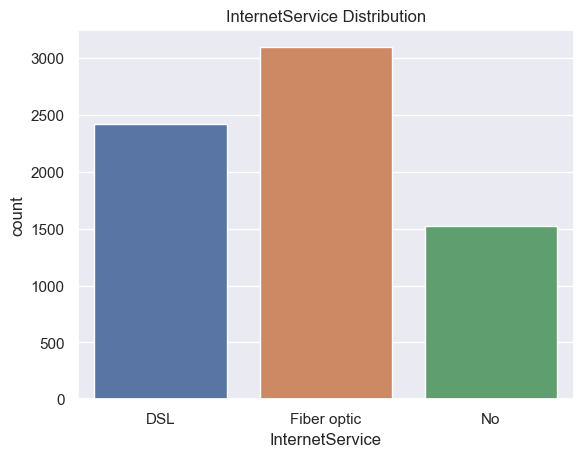

In [21]:
#distribution of InternetService
sns.countplot(x = "InternetService", data = customer_churn)
plt.title("InternetService Distribution")
plt.show()

In [22]:
#count of unique values in the contact column
customer_churn["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

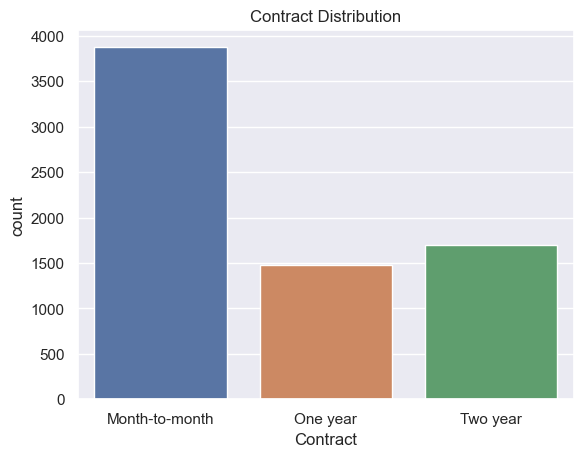

In [23]:
#distribution of Contract
sns.countplot(x = "Contract", data = customer_churn)
plt.title("Contract Distribution")
plt.show()

In [24]:
#count of unique values in the paperlessbilling column
customer_churn["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

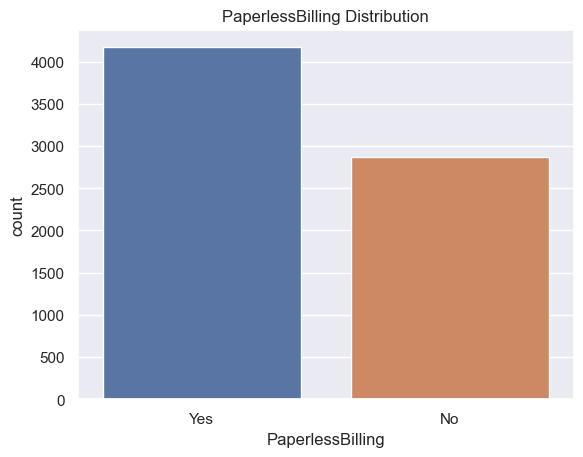

In [25]:
#distribution of InternetService
sns.countplot(x = "PaperlessBilling", data = customer_churn)
plt.title("PaperlessBilling Distribution")
plt.show()

In [26]:
#count of unique values in the paymentmethod column
customer_churn["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

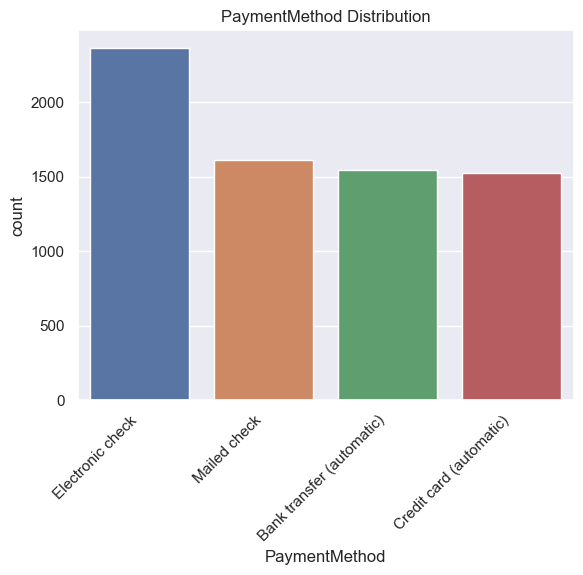

In [27]:
#distribution of PaymentMethod
sns.countplot(x = "PaymentMethod", data = customer_churn)
plt.title("PaymentMethod Distribution")
plt.xticks(rotation = 45, ha = "right") 
plt.show()

In [28]:
#converting the "TotalCharges" column to numeric, coercing errors to NaN
pd.to_numeric(customer_churn.TotalCharges,errors = "coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [29]:
customer_churn[pd.to_numeric(customer_churn.TotalCharges,errors = "coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [30]:
#checking shape
customer_churn.shape

(7043, 20)

In [31]:
#accessing the "TotalCharges" value in the 488th row of the customer_churn DataFrame
customer_churn.iloc[488].TotalCharges

' '

In [32]:
#filtering rows where "TotalCharges" is not an empty string
customer_churn[customer_churn.TotalCharges!=' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [33]:
#checking the shape
customer_churn[customer_churn.TotalCharges!=' '].shape

(7032, 20)

In [34]:
#filter rows where "TotalCharges" is not an empty string and creating a new DataFrame
churn_customer = customer_churn[customer_churn.TotalCharges!=' ']

In [35]:
churn_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [36]:
churn_customer.shape

(7032, 20)

In [37]:
#converting "TotalCharges" column to numeric, replacing errors with NaN
churn_customer.TotalCharges = pd.to_numeric(churn_customer.TotalCharges)

In [38]:
churn_customer.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [39]:
#filtering rows where "Churn" is "No" in the churn_customer DataFrame
churn_customer[churn_customer.Churn == "No"]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [40]:
churn_customer[churn_customer.Churn == "No"].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

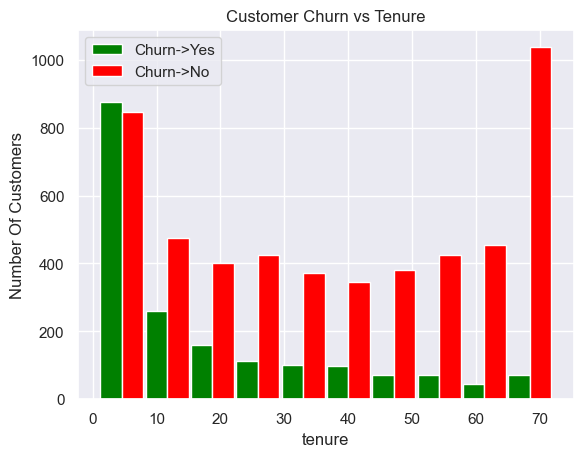

In [41]:
#extracting tenure data for customers with Churn as "Yes" and "No"
tenure_churn_yes = churn_customer[churn_customer.Churn == "Yes"].tenure
tenure_churn_no = churn_customer[churn_customer.Churn == "No"].tenure

#plotting a histogram to compare Customer Churn vs Tenure
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn vs Tenure")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95,
         color=["green", "red"], label=["Churn->Yes", "Churn->No"])

#adding legend to the plot
plt.legend()

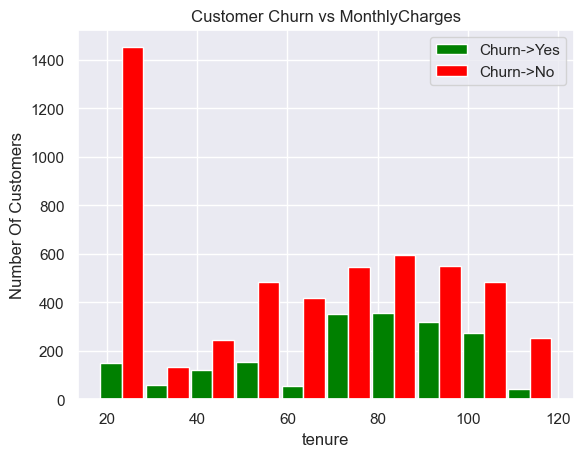

In [42]:
#extracting MonthlyCharges data for customers with Churn as "Yes" and "No"
tenure_churn_yes = churn_customer[churn_customer.Churn == "Yes"].MonthlyCharges
tenure_churn_no = churn_customer[churn_customer.Churn == "No"].MonthlyCharges

#plotting a histogram to compare Customer Churn vs MonthlyCharges
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn vs MonthlyCharges")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95,
         color=["green", "red"], label=["Churn->Yes", "Churn->No"])

#adding legend to the plot
plt.legend()

In [43]:
#define a function named unique_col_values that takes a DataFrame (customer_churn) as input
def unique_col_values(customer_churn):
    #iterate through each column in the DataFrame
    for column in customer_churn:
        #check if the data type of the column is "object"
        if customer_churn[column].dtypes == "object":
            #print the column name and its unique values
            print(f'{column}: {customer_churn[column].unique()}')

In [44]:
unique_col_values(churn_customer)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [45]:
#replacing "No internet service" and "No phone service" with "No" in the churn_customer DataFrame
churn_customer.replace("No internet service","No", inplace=True)
churn_customer.replace("No phone service","No", inplace=True)

In [46]:
unique_col_values(churn_customer)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [47]:
#creating a list of column names containing yes/no values
yes_no_columns = ["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup",
                  "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

#iterate through each column in the list
for col in yes_no_columns:
    #replacing "Yes" with 1 and "No" with 0 in the specified column of the churn_customer DataFrame
    churn_customer[col].replace({"Yes": 1, "No": 0}, inplace = True)

In [48]:
#iterate through each column in the churn_customer DataFrame
for col in churn_customer:
    #print the column name and its unique values
    print(f'{col}: {churn_customer[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [49]:
#replacing "Female" with 1 and "Male" with 0 in the "gender" column of the churn_customer DataFrame
churn_customer["gender"].replace({"Female":1,"Male":0},inplace = True)

In [50]:
churn_customer.gender.unique()

array([1, 0], dtype=int64)

In [51]:
#using pd.get_dummies to one-hot encode categorical columns in churn_customer DataFrame
churn_customer = pd.get_dummies(data = churn_customer, columns=["InternetService","Contract","PaymentMethod"])

In [52]:
#checking column names
churn_customer.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [53]:
churn_customer.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
984,1,0,1,1,72,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
809,0,0,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2187,0,0,1,0,71,1,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0
5850,0,1,0,0,20,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2924,0,0,0,0,11,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
537,1,0,1,1,33,1,0,1,1,1,...,1,0,0,0,1,0,0,0,0,1
4914,1,0,1,1,72,1,1,1,1,0,...,1,0,0,0,0,1,0,0,0,1
3851,1,0,1,1,46,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6626,0,1,1,0,6,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
592,0,0,1,1,63,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0


In [54]:
#checking the data types of each column in the churn_customer DataFrame
churn_customer.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [55]:
#list of columns to scale using Min-Max scaling
cols_to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]

#creating an instance of MinMaxScaler
scaler = MinMaxScaler()

#applying Min-Max scaling to specified columns in the churn_customer DataFrame
churn_customer[cols_to_scale] = scaler.fit_transform(churn_customer[cols_to_scale])

In [56]:
for col in churn_customer:
    #print the column name and its unique values
    print(f'{col}: {churn_customer[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [57]:
#splitting the dataset into features (X) and target variable (y)
X = churn_customer.drop("Churn", axis = "columns")  #X contains all columns except "Churn"
y = churn_customer["Churn"]  #y contains only the "Churn" column

#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [58]:
#checking the shapes
X.shape, X_train.shape, X_test.shape

((7032, 26), (5625, 26), (1407, 26))

In [59]:
#creating a neural network model using Keras Sequential API
model = keras.Sequential([
    #adding a dense layer with 26 neurons, input shape of (26,), and ReLU activation function
    keras.layers.Dense(26, input_shape=(26,), activation="sigmoid"),
    
    #adding another dense layer with 15 neurons and ReLU activation function
    keras.layers.Dense(15, activation="sigmoid"),
    
    #adding the output layer with 1 neuron and sigmoid activation function for binary classification
    keras.layers.Dense(1, activation="sigmoid")
])

In [60]:
#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                702       
                                                                 
 dense_1 (Dense)             (None, 15)                405       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1123 (4.39 KB)
Trainable params: 1123 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
#compiling the neural network model
model.compile(
    optimizer="adam",  # Adam optimizer is being used
    loss="binary_crossentropy",  # Binary cross-entropy loss function for binary classification
    metrics=["accuracy"]  # Monitoring accuracy as the evaluation metric
)

In [62]:
#training the neural network model
history = model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/100
90/90 [==============================] - 1s 5ms/step - loss: 0.5642 - accuracy: 0.7371 - val_loss: 0.5583 - val_accuracy: 0.7236
Epoch 2/100
90/90 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.7371 - val_loss: 0.5117 - val_accuracy: 0.7236
Epoch 3/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4746 - accuracy: 0.7589 - val_loss: 0.4677 - val_accuracy: 0.7662
Epoch 4/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.7867 - val_loss: 0.4524 - val_accuracy: 0.7733
Epoch 5/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.7944 - val_loss: 0.4436 - val_accuracy: 0.7884
Epoch 6/100
90/90 [==============================] - 0s 4ms/step - loss: 0.4290 - accuracy: 0.7984 - val_loss: 0.4384 - val_accuracy: 0.7929
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.7996 - val_loss: 0.4357 - val_accuracy: 0.7929
Epoch 8/100
9

Epoch 59/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4106 - accuracy: 0.8111 - val_loss: 0.4215 - val_accuracy: 0.7884
Epoch 60/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8142 - val_loss: 0.4179 - val_accuracy: 0.7858
Epoch 61/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8124 - val_loss: 0.4188 - val_accuracy: 0.7867
Epoch 62/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.8147 - val_loss: 0.4170 - val_accuracy: 0.7867
Epoch 63/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8129 - val_loss: 0.4205 - val_accuracy: 0.7867
Epoch 64/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4097 - accuracy: 0.8111 - val_loss: 0.4171 - val_accuracy: 0.7831
Epoch 65/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.8140 - val_loss: 0.4197 - val_accuracy: 0.7876
Epoch 

In [63]:
#predicting the target variable using the trained neural network model
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [64]:
y_pred

array([[0.13773215],
       [0.23259644],
       [0.03270452],
       ...,
       [0.01565641],
       [0.5094733 ],
       [0.6435715 ]], dtype=float32)

In [65]:
#converting predicted probabilities to class labels by selecting the index of the maximum probability along the last axis
y_pred = y_pred.argmax(axis = -1)

#calculating the accuracy score by comparing the predicted labels with the actual labels in the test set
accuracy_score(y_test, y_pred)

0.7334754797441365

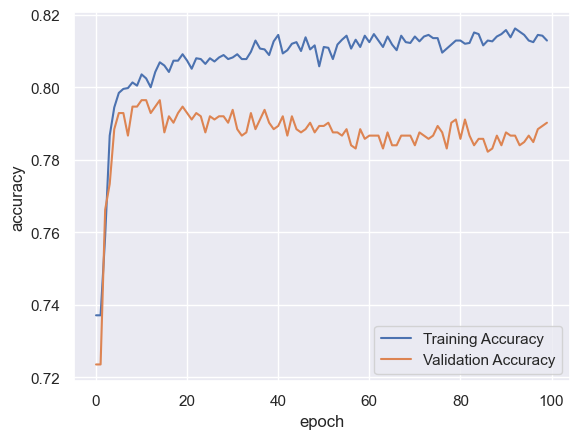

In [66]:
#plotting the training accuracy and validation accuracy over epochs
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

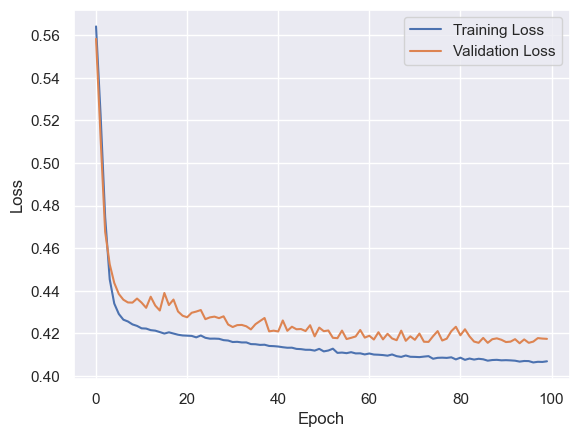

In [67]:
#plotting the training loss and validation loss over epochs
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [68]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1032
           1       0.00      0.00      0.00       375

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



Text(42.25, 0.5, 'Actual')

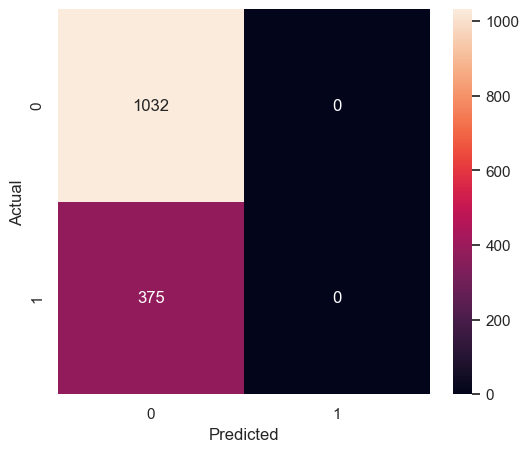

In [69]:
#creating a confusion matrix using TensorFlow for evaluating model performance
cmatrix = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
#plotting the confusion matrix using Seaborn heatmap
plt.figure(figsize = (6,5))
sns.heatmap(cmatrix, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [70]:
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.7334754797441365
